<a href="https://colab.research.google.com/github/PritamRoutray111/Netflix_Recomedation_system/blob/main/NETFLIX_RECOMENDATION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix_dataset=pd.read_csv('/content/drive/MyDrive/Netflix dataset/Copy of combined_data_1.txt.zip',header=None,names=['Cust_Id','Rating'],usecols=[0,1])

In [ ]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count ['Rating']
movie_count

4499

In [ ]:
total_count = netflix_dataset['Cust_Id'].nunique()

In [ ]:
total_count

475257

In [ ]:
customer_count = total_count - movie_count

In [ ]:
customer_count

470758

In [ ]:
rating_count = netflix_dataset['Cust_Id'].count()- movie_count
rating_count

24053764

In [ ]:
# now to find how many users have rated as 1,2,3,4,5 stars to the movies
stars = netflix_dataset.groupby("Rating")['Rating'].agg(['count'])

In [ ]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


Text(0.5, 1.0, 'Total Movie: 4499, Total Customers: 470758, Total no.of ratings: 24053764')

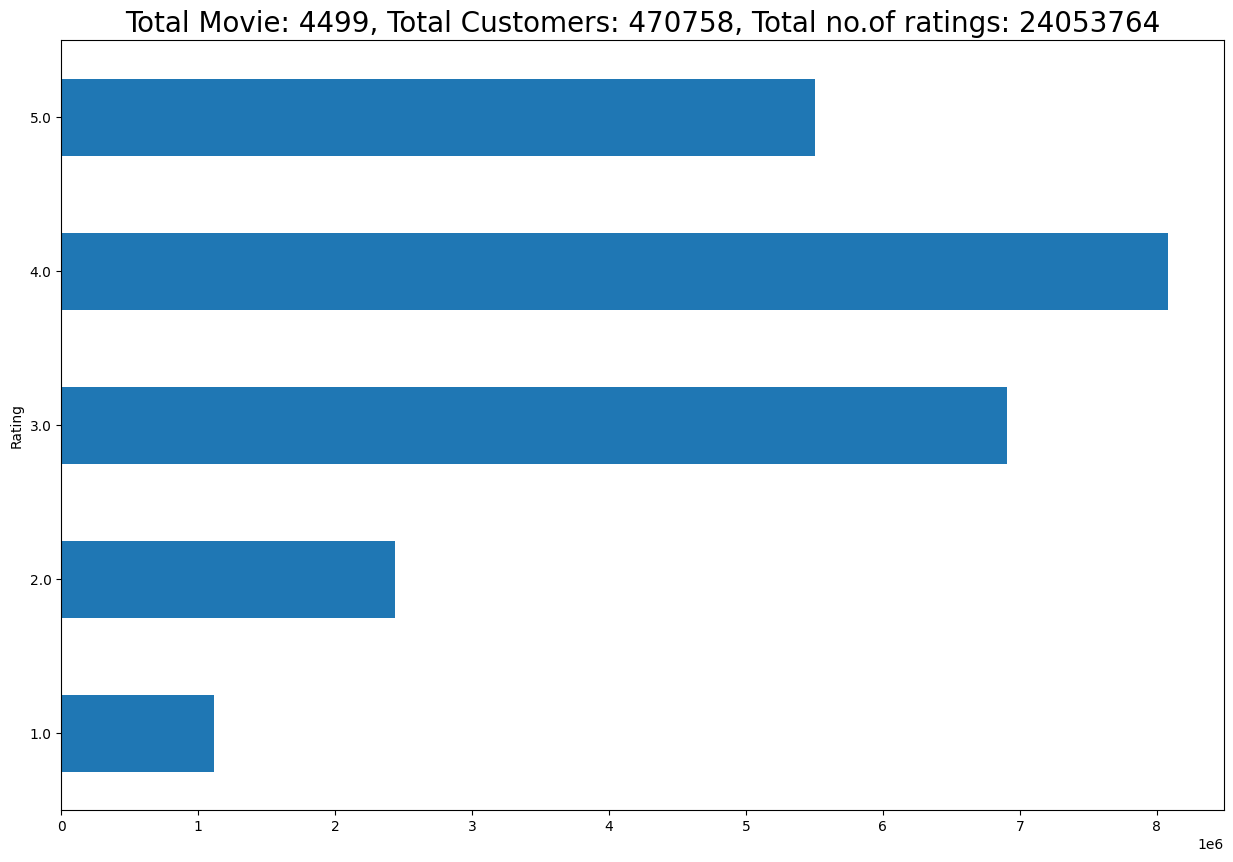

In [ ]:
ax =  stars.plot(kind = 'barh',legend = False,figsize =(15,10))
plt.title(f'Total Movie: {movie_count}, Total Customers: {customer_count}, Total no.of ratings: {rating_count}', fontsize = 20)

In [ ]:
movie_id = None
movie_np =[]

for i in netflix_dataset['Cust_Id']:
  if ':' in i:
    movie_id = int(i.replace(":",''))
  movie_np.append(movie_id)

In [ ]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
netflix_dataset['Movie_Id'] = movie_np

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
# Pre-filtering
# a.Remove the movies which got less number ratings
# b.Remove the customers who have given less number of ratings

In [ ]:
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)

/tmp/ipython-input-25-2277237340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
#For each movie how many ratings we got??

netflix_dataset['Movie_Id'].value_counts()

,count
Movie_Id,
1905,193941
2152,162597
3860,160454
4432,156183
571,154832
...,...
4294,44
915,43
3656,42


In [ ]:
dataset_movie_summary = netflix_dataset.groupby("Movie_Id")['Rating'].agg(['count'])

In [ ]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
#Now we will create a benchmark (consider 60 percentile)
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.6),0)

In [ ]:
movie_benchmark

908.0

In [ ]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

In [ ]:
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [ ]:
len(drop_movie_list)

2699

In [ ]:
dataset_cust_summary = netflix_dataset.groupby("Cust_Id")['Rating'].agg(['count'])

In [ ]:
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.6),0)

In [ ]:
cust_benchmark

36.0

In [ ]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

In [ ]:
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

In [ ]:
len(drop_cust_list)

282042

In [ ]:
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
df_title = pd.read_csv('/content/drive/MyDrive/Netflix dataset/Copy of movie_titles.csv',encoding = 'ISO-8859-1',header = None,names =['Movie_Id','Year','Name'],usecols =[0,1,2])

In [ ]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# import subprocess
# import os
# import sys
# def install_surprise_fix():
#     try:
#         # Step 1: Uninstall NumPy and scikit-surprise
#         print("Uninstalling existing NumPy and scikit-surprise...")
#         subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "-y", "numpy", "scikit-surprise"])
#         # Step 2: Install a compatible NumPy version (1.23.5)
#         print("Installing NumPy 1.23.5...")
#         subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy==1.23.5"])
#         # Step 3: Install scikit-surprise without cache
#         print("Installing scikit-surprise...")
#         subprocess.check_call([sys.executable, "-m", "pip", "install", "--no-cache-dir", "scikit-surprise"])
#         # Step 4: Restart kernel (for Jupyter or Colab)
#         print("Restarting kernel to apply changes...")
#         os._exit(0) # Force restart in Jupyter/Colab

#     except Exception as e:
#       print(f"Error: {e}")
# # Run the fix
# install_surprise_fix()

In [ ]:
from surprise import Reader, Dataset,SVD
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()

In [ ]:
data = Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000],reader)

In [ ]:
data

In [ ]:
model = SVD()

In [ ]:
cross_validate(model,data,measures =['RMSE'],cv =3)

{'test_rmse': array([1.01894986, 1.02123256, 1.01945494]),
 'fit_time': (1.5098769664764404, 1.017331838607788, 1.0342967510223389),
 'test_time': (0.14198517799377441, 0.37520265579223633, 0.44430065155029297)}

In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
user_rating = netflix_dataset[netflix_dataset['Cust_Id'] ==656399]

In [ ]:
user_rating

,Cust_Id,Rating,Movie_Id
700,656399,4.0,3
313860,656399,3.0,83
531242,656399,2.0,156
577666,656399,4.0,175
938038,656399,4.0,206
...,...,...,...
23809726,656399,2.0,4441
23831660,656399,2.0,4460
23951288,656399,4.0,4478
23953869,656399,3.0,4479


In [ ]:
user_656399 = df_title.copy()

In [ ]:
user_656399 = user_656399[~user_656399['Movie_Id'].isin(drop_movie_list)]

In [ ]:
user_656399["Estimated_score"] =user_1331154['Movie_Id'].apply(lambda x: model.predict(656399,x).est)

In [ ]:
user_656399

,Movie_Id,Year,Name,Estimated_score
2,3,1997.0,Character,3.606746
4,5,2004.0,The Rise and Fall of ECW,3.974497
5,6,1997.0,Sick,3.172310
7,8,2004.0,What the #$*! Do We Know!?,3.506204
15,16,1996.0,Screamers,3.091782
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.623736
17766,17767,2004.0,Fidel Castro: American Experience,3.623736
17767,17768,2000.0,Epoch,3.623736
17768,17769,2003.0,The Company,3.623736


In [ ]:
user_656399.sort_values('Estimated_score',ascending = False).head()

,Movie_Id,Year,Name,Estimated_score
27,28,2002.0,Lilo and Stitch,4.063782
4,5,2004.0,The Rise and Fall of ECW,3.974497
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.951363
12744,12745,1986.0,River's Edge,3.623736
12749,12750,1954.0,Indiscretion of an American Wife,3.623736
